Zadanie 1: Dane są następujące obserwacje pochodzące z dwóch grup (klas) etykietowanych elementami ze zbioru $\mathcal{G} = \{0,1\}$:

|  A  |  B  |  C  || Y |
|-----|-----|-----||---|
| 1.0 | 1.3 | 2.6 || 0 |
| 2.2 | 1.1 | 1.2 || 1 |
| 2.0 | 2.4 | 3.8 || 1 |
| 1.5 | 3.2 | 2.1 || 0 |
| 3.2 | 1.2 | 4.2 || 1 |

A, B, C to zmienne (zwane także cechami lub atrybutami) a Y określa etykietę grupy, do której należy dana obserwacja. 

Rozważmy następujący model predykcyjny   

$$M_\mathbf{w}(x_0,x_1) = \frac{1}{1+e^{-(w_0x_0+w_1x_1)}},$$

gdzie $\mathbf{w} = (w_0, w_1)$ to odpowienio wagi wejść $x_0$ i $x_1$ w dwóch przypadkach:
* wejścia $x_0$ i $x_1$ to odpowiednio cechy A i B;
* wejścia $x_0$ i $x_1$ to odpowiednio cechy B i C.

Proszę napisać program w Pythonie, który oblicza błąd średniokwadratowy (ang. *Mean Squared Error*) powyższego modelu w obu przypadkach dla danych obserwacji. Program powininen wyliczać błędy dla wszystkich kombinacji wartości wag, gdzie $w_0 \in [0, 0.1, 0.2, ..., 1]$ oraz $w_1 \in [2, 2.1, 2.2, ..., 3]$. Dla każdego z dwóch przypadków wynikiem działania programu powinna być tablica 2D z wartościami błędu dla poszczególnych kombinacji wag oraz wykres błędu jako funkcji wag $w_0$, $w_1$. 

Błąd średniokwadratowy jest zadany ogólnym wzorem
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat y_i)^2,$$
gdzie $y_i$ to rzeczywiste wartości z danych a $\hat y_i$ to wartości przewidywane przez model.

Proszę przesłać plik .py z kodem za pomocą platformy Moodle przed upływem wyznaczonego terminu.

In [205]:
import numpy as np
import matplotlib.pyplot as plt

In [206]:
A = np.array([1.0, 2.2, 2.0, 1.5, 3.2])
B = np.array([1.3, 1.1, 2.4, 3.2, 1.2])
C = np.array([2.6, 1.2, 3.8, 2.1, 4.2])
Y = np.array([0, 1, 1, 0, 1])

w = np.mgrid[0:1.1:0.1, 2:3.1:0.1]

In [207]:
def model_w(w_0, w_1, x_0, x_1):
    return 1 / (1 + np.exp(-(w_0 * x_0 + w_1 * x_1)))

In [208]:
y_hat_A_B = np.array([[model_w(w_0[0], w_1[w_1_idx], A, B) for w_0 in w[0,:,:]] for w_1_idx, w_1 in enumerate(w[1,:,:])])
y_hat_B_C = np.array([[model_w(w_0[0], w_1[w_1_idx], B, C) for w_0 in w[0,:,:]] for w_1_idx, w_1 in enumerate(w[1,:,:])])

In [209]:
def mse(y, y_hat):
    return np.mean((y-y_hat)**2)

In [210]:
mse_A_B = np.array([[mse(Y, y_hat_A_B[w_1_idx, w_0_idx]) for w_0_idx, w_0 in enumerate(w[0,:,:])] for w_1_idx, w_1 in enumerate(w[1,:,:])])

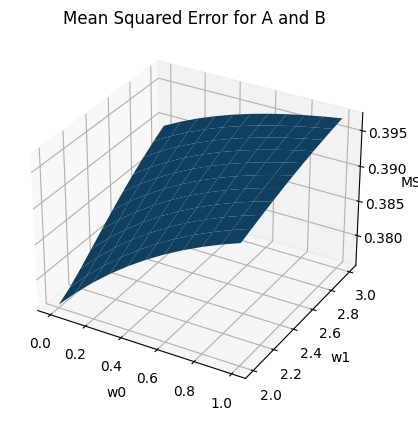

In [211]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(title='Mean Squared Error for A and B', zlabel='MSE', xlabel='w0', ylabel='w1')

ax.plot_surface(w[0,:,:], w[1,:,:], mse_A_B)

In [212]:
mse_B_C = np.array([[mse(Y, y_hat_B_C[w_1_idx, w_0_idx]) for w_0_idx, w_0 in enumerate(w[0,:,:])] for w_1_idx, w_1 in enumerate(w[1,:,:])])

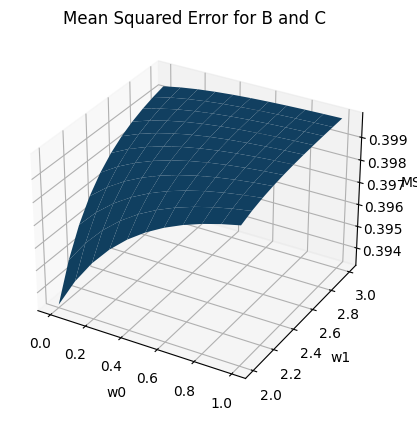

In [213]:
ax = plt.axes(projection='3d')
ax.set(title='Mean Squared Error for B and C',zlabel='MSE', xlabel='w0', ylabel='w1')

ax.plot_surface(w[0,:,:], w[1,:,:], mse_B_C)